### Кластеризация пикселей изображения

В данной задаче мы кластеризуем пиксели изображения на выбранное количество кластеров. Это может пригодиться для сжатия размера изображения или выделения границ объектов для CV задач. 

In [3]:
from skimage.io import imread
from skimage import img_as_float
import pylab
import numpy as np
from sklearn.cluster import MiniBatchKMeans

In [7]:
# загружаем картинку
image = imread('untitled/888.png')
img = img_as_float(image)

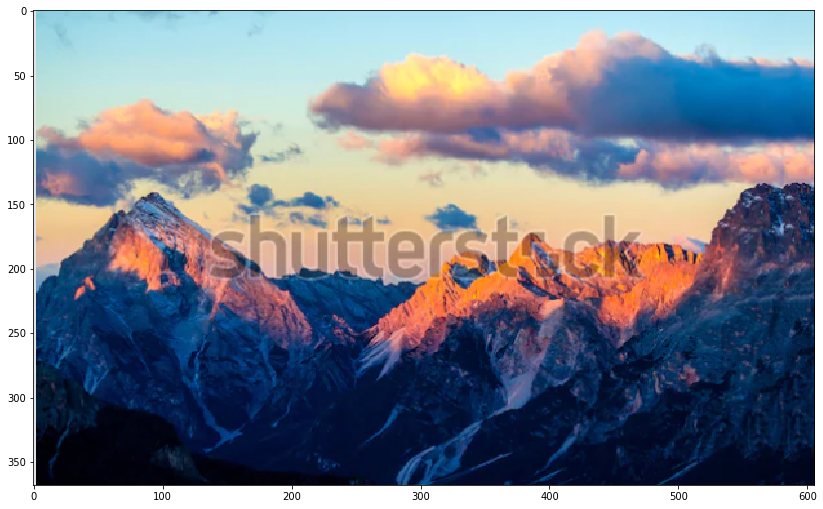

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = (14, 10)
pylab.imshow(image)

In [14]:
def get_clusters(n_clust,  data):
    """
    генерируем заданное колиичество кластеров, для их расположения пользуемся следующей импирикой:
    для того, что бы кластера не находились в большом удалении от данных, 
    расположим их используя нормальное распределение
    """
    ax = np.mean(data, axis=0)
    scale = np.std(data, axis=0)
    nps = np.random.RandomState(seed=40)
    clusters = nps.normal(loc=ax, scale=scale, size=(n_clust, data.shape[1]))
    return clusters


def euclidean_dist(instance1, instance2):
    """расчитываем евклидово расстояние между двумя точками"""
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    return np.sqrt(sum((instance1 - instance2)**2))


def update_y_pred(X, clusters, y_pred):
    """
    назначаем каждому примеру данных значение ближайшего центра кластера
    """
    for i in range(X.shape[0]):
        old_dist = 9e12
        for num, cl in zip(range(clusters.shape[0]), clusters):
            distance = euclidean_dist(X[i], cl)
            if distance < old_dist:
                y_pred[i] = num
                old_dist = distance
    return y_pred


def update_clusters(X, clusters, y_pred):
    """
    перемещаем кластер в центр масс данных, приинадлежащих этому же кластеру
    """
    for clust in range(clusters.shape[0]):
        list_cluster = X[y_pred==clust]
        if len(list_cluster) > 0:
            clusters[clust] = np.mean(list_cluster, axis=0)
    return clusters


def my_kmeans(X, n_clusters):
    """
    итеративно меням центры кластеров пока ошибка на предыдущем шаге будет отличаться от ошибке на 
    следующем шаге менее 0.01
    """
    clusters = get_clusters(n_clusters,  X)
    y_pred = np.zeros(X.shape[0])
    clusters_old = np.zeros_like(clusters)
    while abs((clusters - clusters_old).sum())>=0.01:
        clusters_old = clusters.copy()
        y_pred = update_y_pred(X, clusters, y_pred) # определяем принадлежность точки ближайшему кластеру
        clusters = update_clusters(X, clusters, y_pred) # обновляем центроид кластера
    return y_pred

In [15]:
def get_image(img, n_clusters, my_function):
    """
    функция для кластеризации пикселей изображения на основе переданной функции
    """
    pixels = img.reshape(img.shape[0]*img.shape[1], 3)
    
    pixels_classes = my_function(pixels, n_clusters)
    
    pixel_class_to_mean_pixel = {}
    for cl in set(pixels_classes):
        t = pixels[pixels_classes==cl]
        pixel_class_to_mean_pixel[cl] = t.mean(axis=0)
    new_pixels_mean = np.array([pixel_class_to_mean_pixel[cl] for cl in pixels_classes])
    
    new_image_mean = new_pixels_mean.reshape(img.shape[0], img.shape[1], 3)
    pylab.imshow(new_image_mean)

Wall time: 14min 58s


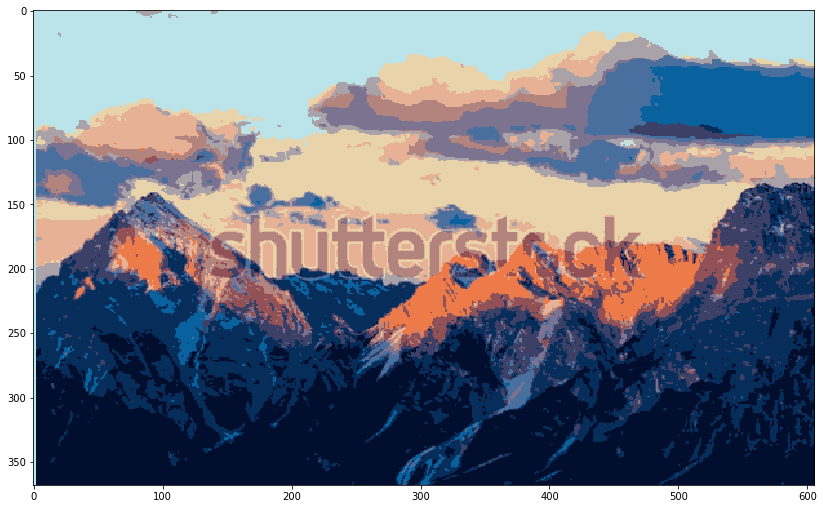

In [16]:
%%time
get_image(img, 16, my_kmeans)

Wall time: 4min 23s


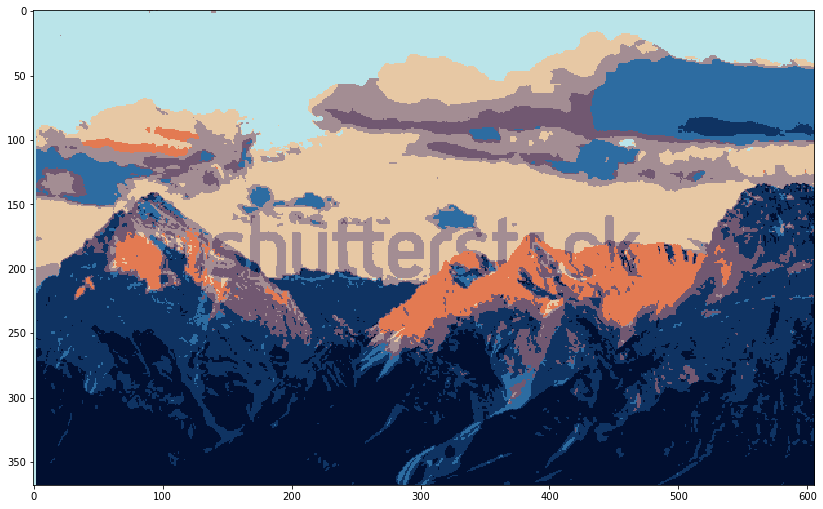

In [17]:
%%time
get_image(img, 8, my_kmeans)

Wall time: 17 s


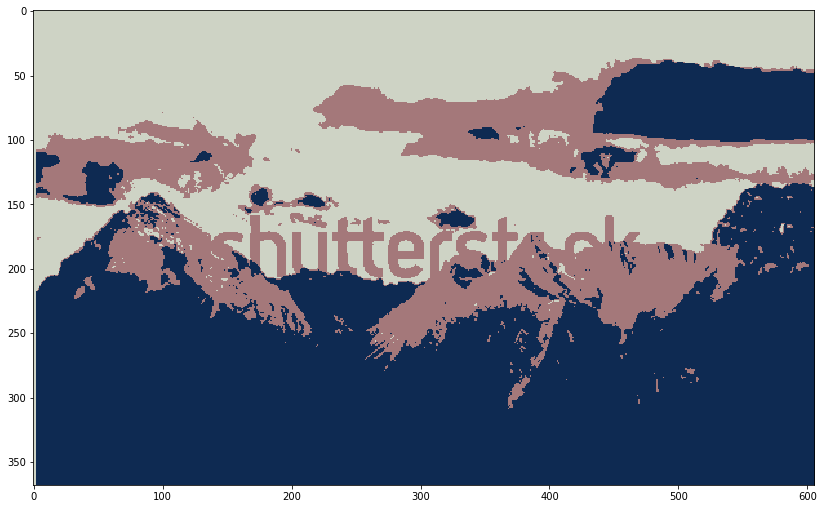

In [18]:
%%time
get_image(img, 3, my_kmeans)

## MiniBatchKmeans 
Одна из модификаций алгоритма Kmeans

Главное отличии MiniBatchKmeans от Kmeans, это то что алгоритм использует не все данные для обучения, а лишь небольшой случайно выбранный batch фиксированного размера, что экономит объем затраченной памяти и ускоряет процесс обучения. На каждой итерации берется новый семпл данных. Каждый семпл обновляет центры кластеров со скоростью, обратно пропорциональных количеству итераций и вычисляется по формуле: $O_{i} = (1-lr)O_{i-1} + lr * X_{c}$, где $lr = 1/N$

### Домашнее задание
Реализовать собственный MiniBatchKmeans (изменив следующие функции: update_clusters, my_kmeans). Можно добавлять дополнительные параметры к функциям.

Кластерезовать пиксели в данной картинке по цветам и сравнить время выполнения Kmeans и MiniBatchKmeans.

In [1]:
def update_clusters(X, clusters, y_pred):
    """
    перемещаем кластер в центр масс данных, приинадлежащих этому же кластеру
    """
    pass # нужно заменить на свой код
    return clusters


def my_MimiBatchKmeans(X, n_clusters, batch_size=30000):
    """
    итеративно меням центры кластеров пока ошибка на предыдущем шаге будет отличаться от ошибке на 
    следующем шаге менее 0.01
    """
    pass # нужно заменить на свой код
    return y_pred

In [19]:
# %%time
# get_image(img, 16, my_MimiBatchKmeans)

In [20]:
# %%time
# get_image(img, 8, my_MimiBatchKmeans)

In [21]:
# %%time
# get_image(img, 3, my_MimiBatchKmeans)